# ***1.Import Required Libraries***

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# ***2.Load the Dataset and select the features for clustering***

In [78]:
df = pd.read_csv('student_marks.csv')
marks = df[['Subject1', 'Subject2']].values

# ***3.Standardize the Data***

In [79]:
scaler = StandardScaler()
marks_scaled = scaler.fit_transform(marks)

# ***4.Apply K-Means Clustering***

In [80]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(marks_scaled)

# ***5.Extract Cluster Centroids and Map Cluster Numbers to Labels***

In [81]:
centroids = kmeans.cluster_centers_
cluster_names = {0: 'High Performers', 1: 'Low Performers'}  # You can adjust labels as needed
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# ***6.Save Clustered Data to CSV***

In [82]:
df.to_csv('student_marks_clustered.csv', index=False)

# ***7.Evaluate Clustering Performance***

In [83]:
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(marks_scaled, df['Cluster'])
db_index = davies_bouldin_score(marks_scaled, df['Cluster'])
print(f"Inertia (SSE): {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Inertia (SSE): 1.29
Silhouette Score: 0.71
Davies-Bouldin Index: 0.33


# ***8.Cluster wise summary statistics***

In [84]:
print("\nCluster Information:")
print(df.groupby('Cluster Name')[['Subject1', 'Subject2']].mean())


Cluster Information:
                  Subject1   Subject2
Cluster Name                         
High Performers  83.333333  83.666667
Low Performers   59.000000  54.000000


# ***9.Visualize the Clusters***

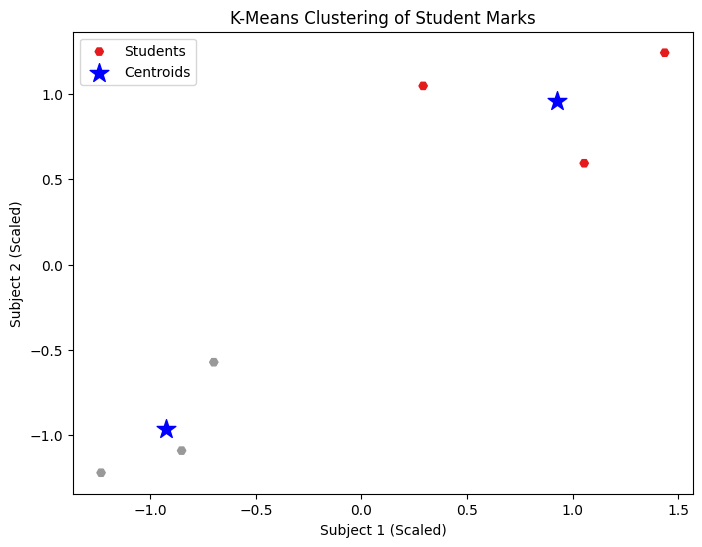

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(marks_scaled[:, 0], marks_scaled[:, 1], c=df['Cluster'], cmap='Set1', marker='H', edgecolors='face', label='Students')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='blue', marker='*', label='Centroids')
plt.xlabel('Subject 1 (Scaled)')
plt.ylabel('Subject 2 (Scaled)')
plt.title('K-Means Clustering of Student Marks')
plt.legend()
plt.show()